In [1]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv(r'D:\cupoy_learn\Midterm_test\train_data.csv')
print(df.shape)
df.head()

(113, 22)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [3]:
# 檢查每個 column的遺失值個數
print(df.isna().sum())
# 檢查每個 column型別
print(df.dtypes)

name                           0
bonus                         52
deferral_payments             85
deferred_income               79
director_fees                100
email_address                 30
exercised_stock_options       32
expenses                      40
from_messages                 48
from_poi_to_this_person       48
from_this_person_to_poi       48
loan_advances                111
long_term_incentive           64
other                         44
poi                            0
restricted_stock              31
restricted_stock_deferred    103
salary                        40
shared_receipt_with_poi       48
to_messages                   48
total_payments                17
total_stock_value             15
dtype: int64
name                          object
bonus                        float64
deferral_payments            float64
deferred_income              float64
director_fees                float64
email_address                 object
exercised_stock_options      float64
ex

In [3]:
# 刪除遺失值太多的欄位
print(len(df) * 0.8)
df.drop(columns=['director_fees', 'loan_advances', 'restricted_stock_deferred'], inplace=True)

90.4


In [4]:
# 補值
df1 = df.fillna(method='bfill')
df1 = df1.fillna(method='ffill')
df_x = df1.drop(columns=['poi', 'name', 'email_address'])
df_y = df1['poi']
df_x = StandardScaler().fit_transform(df_x)

rf_c = RandomForestClassifier().fit(df_x, df_y)
im_df = pd.DataFrame(data=rf_c.feature_importances_, index= df.drop(columns=['poi', 'name', 'email_address']).columns)
im_df

,0
bonus,0.038818
deferral_payments,0.109256
deferred_income,0.041113
exercised_stock_options,0.232875
expenses,0.058875
from_messages,0.014465
from_poi_to_this_person,0.047220
from_this_person_to_poi,0.010210
long_term_incentive,0.158388
other,0.034591


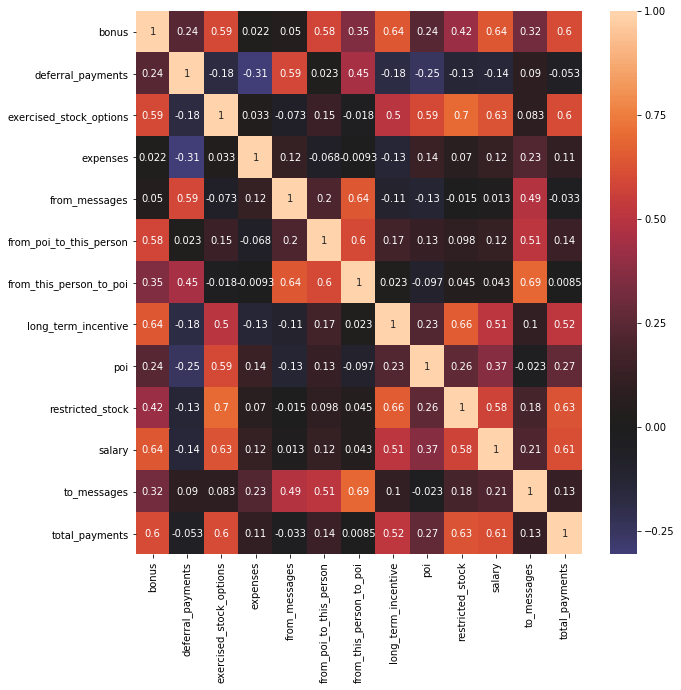

In [5]:
# deferral_payments, deferred_income -0.85
# exercised_stock_options, total_stock_value 0.96
# other, total_payments 0.915708
# restricated_stock, total_stock_value 0.86
# shared_recipt_with_poi, to_messages 0.86

# 刪除高度相關的欄位
df.drop(columns=['total_stock_value', 'deferred_income', 'other', 'shared_receipt_with_poi'],inplace=True)
plt.figure(figsize=(10,10))
corrMatrix = df.corr()

sn.heatmap(corrMatrix, annot=True, center=0)
plt.show()

In [6]:
# 補值
df.fillna(method='bfill', inplace=True)
df.fillna(method='ffill', inplace=True)

In [7]:
import seaborn as sn
import matplotlib.pyplot as plt

In [8]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler

In [73]:
df_x = df.drop(columns=['poi', 'name', 'email_address'])
df_y = df['poi']
df_x = StandardScaler().fit_transform(df_x)

rf_c = RandomForestClassifier(oob_score=True).fit(df_x, df_y)

In [74]:
im_df = pd.DataFrame(data=rf_c.feature_importances_, index= df.drop(columns=['poi', 'name', 'email_address']).columns)
print(rf_c.oob_score_)
im_df

0.9557522123893806


,0
bonus,0.068724
deferral_payments,0.161132
exercised_stock_options,0.212751
expenses,0.059057
from_messages,0.036669
from_poi_to_this_person,0.062072
from_this_person_to_poi,0.031477
long_term_incentive,0.156330
restricted_stock,0.065990
salary,0.054964


False    100
True      13
Name: poi, dtype: int64


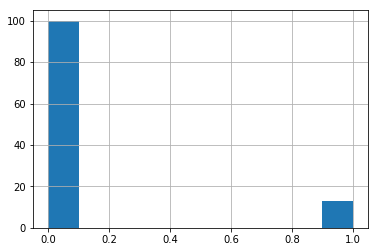

In [11]:
print(df['poi'].value_counts())
df['poi'].astype('int').hist()

In [12]:
from imblearn.over_sampling import SMOTE
# for reproducibility purposes
seed = 100
# SMOTE number of neighbors
k = 1

X = df.drop(columns=['poi','name','email_address'])
y = df.poi
sm = SMOTE(sampling_strategy='auto', k_neighbors=k, random_state=seed)
new_tuple = sm.fit_resample(X,y)
new_x = new_tuple[0]
new_y = new_tuple[1]

In [19]:
new_y.sum()

100

In [13]:
sds = StandardScaler().fit(new_x)
df_x = sds.transform(new_x)
rf_c = RandomForestClassifier(oob_score=True).fit(df_x, new_y)

In [14]:
im_df = pd.DataFrame(data=rf_c.feature_importances_, index= new_x.columns)
print(rf_c.oob_score_)
im_df

0.975


,0
bonus,0.046483
deferral_payments,0.141533
exercised_stock_options,0.165711
expenses,0.086356
from_messages,0.067863
from_poi_to_this_person,0.093235
from_this_person_to_poi,0.107449
long_term_incentive,0.089777
restricted_stock,0.073437
salary,0.036304


In [19]:
test_df = pd.read_csv(r'D:\cupoy_learn\Midterm_test\test_features.csv')
test_df.head()

,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,BELDEN TIMOTHY N,5249999.0,2144013.0,-2334434.0,NaN,tim.belden@enron.com,953136.0,17355.0,484.0,228.0,...,NaN,NaN,210698.0,157569.0,NaN,213999.0,5521.0,7991.0,5501630.0,1110705.0
1,BOWEN JR RAYMOND M,1350000.0,NaN,-833.0,NaN,raymond.bowen@enron.com,NaN,65907.0,27.0,140.0,...,NaN,974293.0,1621.0,252055.0,NaN,278601.0,1593.0,1858.0,2669589.0,252055.0
2,HANNON KEVIN P,1500000.0,NaN,-3117011.0,NaN,kevin.hannon@enron.com,5538001.0,34039.0,32.0,32.0,...,NaN,1617011.0,11350.0,853064.0,NaN,243293.0,1035.0,1045.0,288682.0,6391065.0
3,DELAINEY DAVID W,3000000.0,NaN,NaN,NaN,david.delainey@enron.com,2291113.0,86174.0,3069.0,66.0,...,NaN,1294981.0,1661.0,1323148.0,NaN,365163.0,2097.0,3093.0,4747979.0,3614261.0
4,CAUSEY RICHARD A,1000000.0,NaN,-235000.0,NaN,richard.causey@enron.com,NaN,30674.0,49.0,58.0,...,NaN,350000.0,307895.0,2502063.0,NaN,415189.0,1585.0,1892.0,1868758.0,2502063.0


In [20]:
test_df = test_df.drop(columns=['name','deferred_income','director_fees','email_address','loan_advances','other',
                      'restricted_stock_deferred','shared_receipt_with_poi','total_stock_value'])
test_df.head()

,bonus,deferral_payments,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,restricted_stock,salary,to_messages,total_payments
0,5249999.0,2144013.0,953136.0,17355.0,484.0,228.0,108.0,NaN,157569.0,213999.0,7991.0,5501630.0
1,1350000.0,NaN,NaN,65907.0,27.0,140.0,15.0,974293.0,252055.0,278601.0,1858.0,2669589.0
2,1500000.0,NaN,5538001.0,34039.0,32.0,32.0,21.0,1617011.0,853064.0,243293.0,1045.0,288682.0
3,3000000.0,NaN,2291113.0,86174.0,3069.0,66.0,609.0,1294981.0,1323148.0,365163.0,3093.0,4747979.0
4,1000000.0,NaN,NaN,30674.0,49.0,58.0,12.0,350000.0,2502063.0,415189.0,1892.0,1868758.0


In [65]:
values = {'bonus': new_x[['bonus']].median()[0], 'deferral_payments': new_x[['deferral_payments']].median()[0],
         'exercised_stock_options': new_x[['exercised_stock_options']].median()[0], 'expenses': new_x[['expenses']].median()[0],
         'from_messages': new_x[['from_messages']].median()[0], 'from_poi_to_this_person': new_x[['from_poi_to_this_person']].median()[0],
         'from_this_person_to_poi': new_x[['from_this_person_to_poi']].median()[0], 'long_term_incentive': new_x[['long_term_incentive']].median()[0],
         'restricted_stock': new_x[['restricted_stock']].median()[0], 'salary': new_x[['salary']].median()[0],
         'to_messages': new_x[['to_messages']].median()[0], 'total_payments': new_x[['total_payments']].median()[0]}

test_df = test_df.fillna(value=values)
test_df.head()

,bonus,deferral_payments,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,long_term_incentive,restricted_stock,salary,to_messages,total_payments
0,5249999.0,2.144013e+06,9.531360e+05,17355.0,484.0,228.0,108.0,4.897262e+05,157569.0,213999.0,7991.0,5501630.0
1,1350000.0,1.803687e+05,1.627374e+06,65907.0,27.0,140.0,15.0,9.742930e+05,252055.0,278601.0,1858.0,2669589.0
2,1500000.0,1.803687e+05,5.538001e+06,34039.0,32.0,32.0,21.0,1.617011e+06,853064.0,243293.0,1045.0,288682.0
3,3000000.0,1.803687e+05,2.291113e+06,86174.0,3069.0,66.0,609.0,1.294981e+06,1323148.0,365163.0,3093.0,4747979.0
4,1000000.0,1.803687e+05,1.627374e+06,30674.0,49.0,58.0,12.0,3.500000e+05,2502063.0,415189.0,1892.0,1868758.0


In [66]:
test_df.isna().sum()

bonus                      0
deferral_payments          0
exercised_stock_options    0
expenses                   0
from_messages              0
from_poi_to_this_person    0
from_this_person_to_poi    0
long_term_incentive        0
restricted_stock           0
salary                     0
to_messages                0
total_payments             0
dtype: int64

In [67]:
test_x = sds.transform(test_df)

pred = rf_c.predict(test_x)

In [72]:
test_ans = pd.read_csv(r'D:\cupoy_learn\Midterm_test\test_features.csv')
test_ans = test_ans[['name']]
test_ans['poi'] = pred
test_ans = test_ans.replace([False, True], [0, 1])
test_ans.to_csv(r'D:\cupoy_learn\Midterm_test\test_pred_1.csv', index=False)

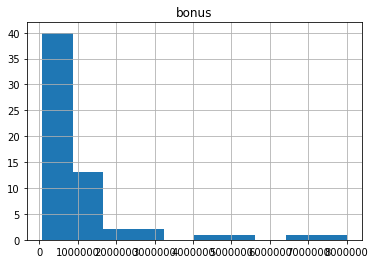

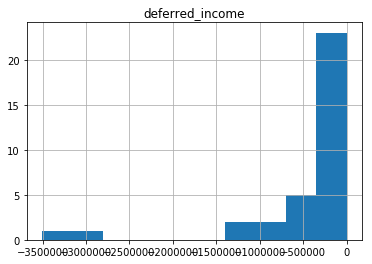

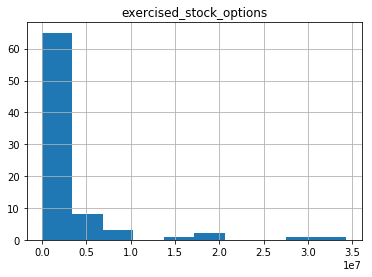

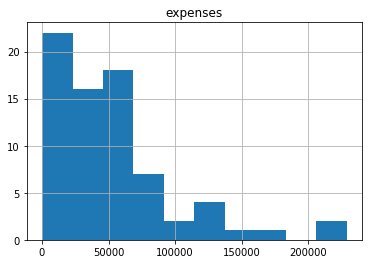

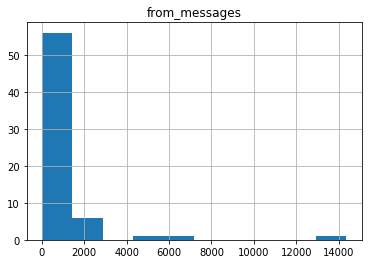

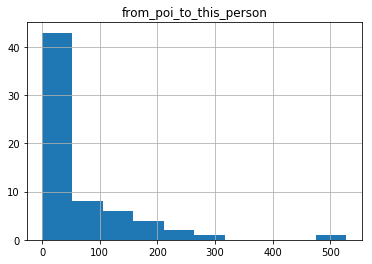

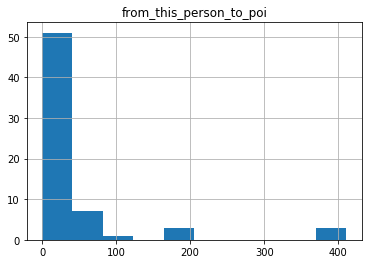

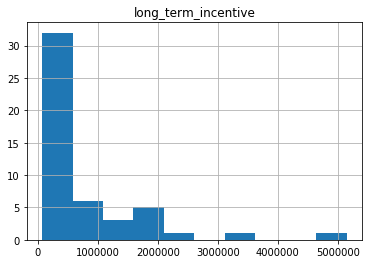

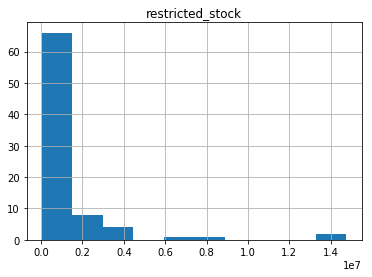

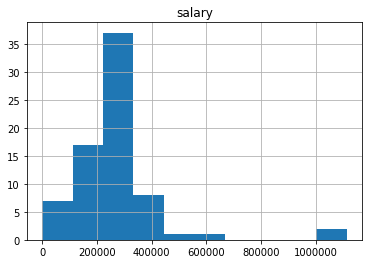

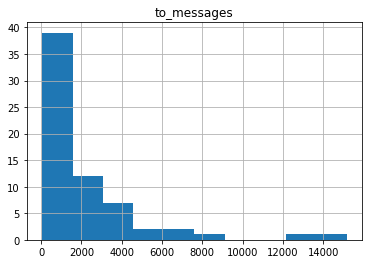

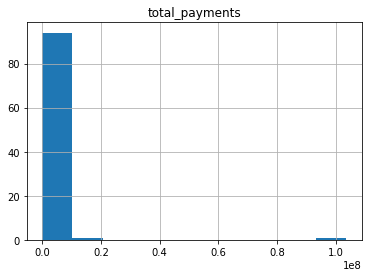

In [31]:
for item, value in enumerate(df.dtypes):
    if value == 'float64':
        df.hist(column=df.columns[item])